<a href="https://colab.research.google.com/github/harnalashok/general/blob/master/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 09/04/2021
# Myfolder:
# github:
# Objective(s):
#               i) Understand Pearson correlation coefficient
#              ii) chi-square test of independence
#             iii) Feature selection using chi2 test
#              iv) Graphing correlation using seaborn

# Dataset(s)
#              i) iris
#             ii) housing (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

# https://github.com/scikit-learn/scikit-learn/blob/95119c13a/sklearn/feature_selection/_univariate_selection.py#L173

In [ ]:
# 1.0 Call libraries
import numpy as np
import pandas as pd
# 1.0.1
import matplotlib.pyplot as plt
import seaborn as sns
# 1.0.2
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelBinarizer
# 1.0.3
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import os

In [ ]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Pearson's correlation coefficient
Learn more at [wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [ ]:
# 1.2 Housing dataset from Kaggle
#path2 = "C:\\Users\\ashok\\OneDrive\\Documents\\housing_prices"
path2 = "/content"
os.chdir(path2)
housing = pd.read_csv("train.csv")

In [ ]:
# 1.2.1
housing.shape    # (1460, 80)
print()
housing.head()


In [ ]:
# 1.2.2
housing.drop(columns = "Id", inplace = True)

# 1.2.3 The following selection
#       doesnot guarantee that discrete
#       features will not be selected.
#       So be careful!

dh = housing.select_dtypes(
                            include = ['float64', 'int64']
                           ).copy()
dh.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
# 1.2.4
dh.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# 1.3 Get pair-wise correlation
so = dh.corr()
so

In [ ]:
# 1.4 Understand so
#     so is a pandas DataFrame:

so.columns
print()
print()
so.index

#### Relationship of numeric features with target, SalePrice

In [ ]:
# 2.0 In so, just pick up SalePrice column

df_cor = so[['SalePrice']]
df_cor

In [ ]:
# 2.1 Pickup SalePrice column, and sort it

df_cor = so[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)
df_cor

In [ ]:
# 2.2 Draw heatmap of 
plt.figure(figsize=(8, 12))
_= sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, cmap='BrBG')

#### Some plots exhibiting relationship with SalePrice

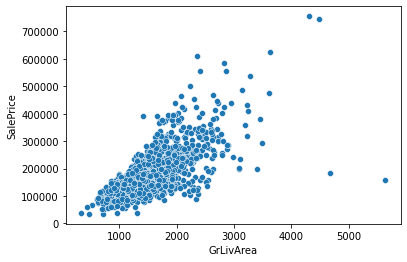

In [ ]:
# 3.1
_=sns.scatterplot(data = housing, x = "GrLivArea", y = "SalePrice")

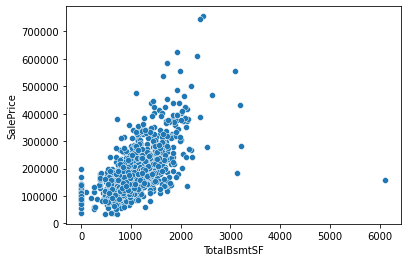

In [ ]:
# 3.2
_=sns.scatterplot(data = housing, x = 'TotalBsmtSF', y = 'SalePrice')

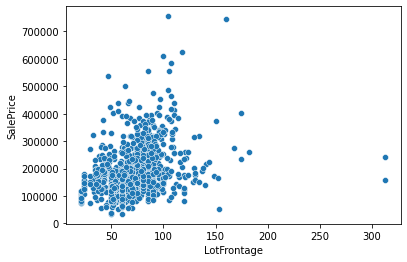

In [ ]:
# 3.3
_=sns.scatterplot(data = housing, x = 'LotFrontage', y = 'SalePrice')

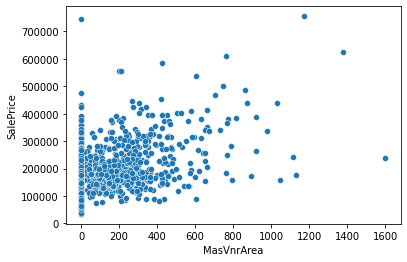

In [ ]:
# 3.4
_=sns.scatterplot(data = housing, x = 'MasVnrArea', y = 'SalePrice')

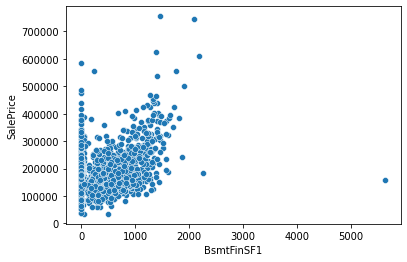

In [ ]:
# 3.5
_=sns.scatterplot(data = housing, x = 'BsmtFinSF1', y = 'SalePrice')

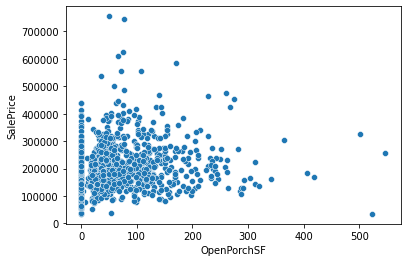

In [ ]:
# 3.6
_=sns.scatterplot(data = housing, x = 'OpenPorchSF', y = 'SalePrice')

#### chi2 calculations
Test of independence between two categories or discrete features

In [ ]:
# 4.0 Select just 'object' features
dcat = housing.select_dtypes(include = ["object"]).copy()
dcat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# 4.1 Are zoning and utilities independent?
obs1 = pd.crosstab(dcat['MSZoning'],dcat['Utilities'])
obs1

In [ ]:
# 4.2 Even though we are calculating chi2 value
#     for above table, prudence dictates that
#     each cell should at the leats have 5-counts:

chi2, p, dof, exptd = chi2_contingency(obs1)
chi2
print()
p
print()


0.2686462110308467

0.9917472273613425

In [ ]:
# 4.3 Are zoning and utilities independent?
obs1 = pd.crosstab(dcat['MSZoning'],dcat['Street'])
obs1
print()

# 4.4 See CAUTION note above
#     Prudence dictates that
#     each cell should at the leats have 5-counts:

chi2, p, dof, exptd = chi2_contingency(obs1)
p

## How sklearn implement's feature selection
Reference source code [here](https://github.com/scikit-learn/scikit-learn/blob/95119c13a/sklearn/feature_selection/_univariate_selection.py#L173)  
Also see [this reference](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

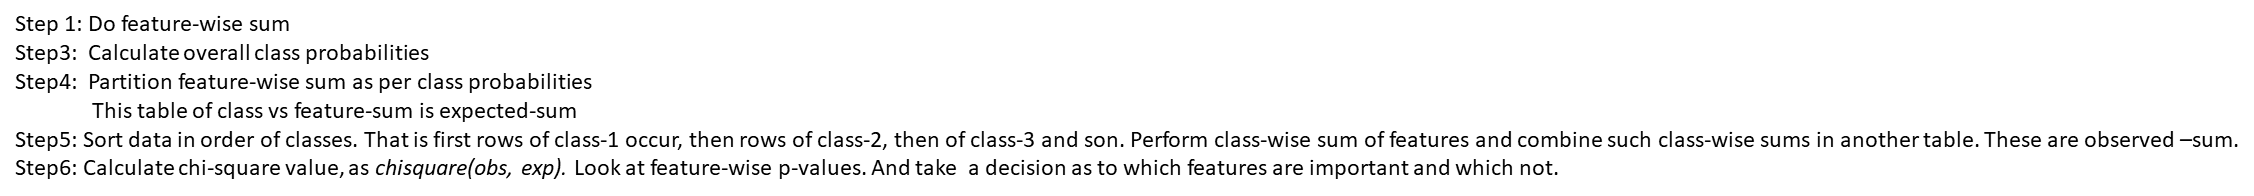

In [ ]:
# 5.0 Import some data to play with
X, y = load_iris(return_X_y=True)

In [ ]:
# 5.1 A bit about data
X.shape    # (150,4)
print()
y.shape    # (150,) 
print()
X[:5]
print()
y[:10]
print()
np.unique(y)  # [0,1,2]

(150, 4)

(150,)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 1, 2])

### Perform supervised binning
Bin continuous features

In [ ]:
# 5.3 Binarize labels in a one-vs-all fashion:

Y = LabelBinarizer().fit_transform(y)
Y

In [ ]:
# 5.4
X.sum(axis = 0)

array([876.5, 458.6, 563.7, 179.9])

In [ ]:
# 5.5
feature_sums = X.sum(axis=0).reshape(1, -1)
feature_sums

array([[876.5, 458.6, 563.7, 179.9]])

In [ ]:
# 5.6
Y.mean(axis=0).reshape(1, -1)

array([[0.33333333, 0.33333333, 0.33333333]])

In [ ]:
# 6.0
class_prob = Y.mean(axis=0).reshape(1, -1)
class_prob

array([[0.33333333, 0.33333333, 0.33333333]])

In [ ]:
# 6.1
class_prob.T

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

Calculate

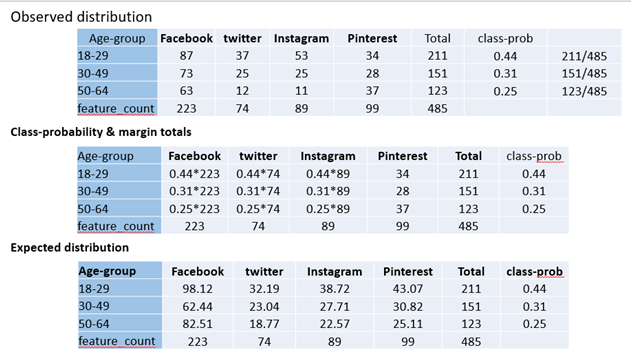


OK

In [ ]:
#7.0 Expected calculations:

np.dot([[0.44],[0.31],[0.25]], [[223,74,89,99]])

array([[98.12, 32.56, 39.16, 43.56],
       [69.13, 22.94, 27.59, 30.69],
       [55.75, 18.5 , 22.25, 24.75]])

In [ ]:
# 7.1 So what are expected sum for iris data
expected_sums = np.dot(class_prob.T, feature_sum)
expected_sums

array([[292.16666667, 152.86666667, 187.9       ,  59.96666667],
       [292.16666667, 152.86666667, 187.9       ,  59.96666667],
       [292.16666667, 152.86666667, 187.9       ,  59.96666667]])

chi-square calculation

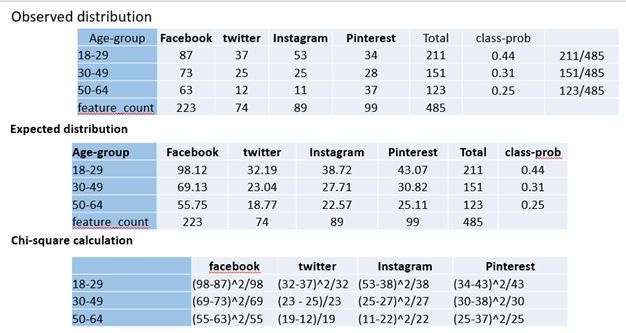

OK

#### Experiment to calculate observed sums

In [ ]:
# 8.0 Some data
data = np.array(
                   [
                        [2,5,10],
                        [2,5,10],
                        [3,6,20],
                        [3,6,20],
                        [4,1,20],
                        [4,1,20]
                    ]
                )
data

array([[ 2,  5, 10],
       [ 2,  5, 10],
       [ 3,  6, 20],
       [ 3,  6, 20],
       [ 4,  1, 20],
       [ 4,  1, 20]])

In [ ]:
# 8.1 Some 'binarized' labels for above data:

cls = np.array(
                [
                   [1,0],
                   [1,0],
                   [0,1],
                   [0,1],
                   [0,1],
                   [0,1]
              ]
           )

cls

array([[1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
# 8.2 Get observed sums
np.dot(cls.T, data)

array([[ 4, 10, 20],
       [14, 14, 80]])

Observed sum for iris data

In [ ]:
observed_sums = np.dot(Y.T, X)
observed_sums

array([[250.3, 171.4,  73.1,  12.3],
       [296.8, 138.5, 213. ,  66.3],
       [329.4, 148.7, 277.6, 101.3]])

In [ ]:
# Calculate column wise
# chi-square stat and column-wise
# p-value
# NOTE: When f_obs is 2-D, by default the test is applied to each column
# chisquare(f_obs, f_exp=None)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
chisquare(observed_sums, expected_sums)


Power_divergenceResult(statistic=array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]), pvalue=array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

Result is column-wise chi-square stat calculations and column-wise p-value calculations:<br>  

`statistic=array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])<br>

`pvalue=array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [ ]:
###############